In [1]:
import pcl
import numpy as np

In [22]:
import pptk
P = np.random.rand(100,3)
v = pptk.viewer(P)

In [33]:
p = pcl.PointCloud()
p.from_file(b'/Users/tom/Downloads/python-pcl-master/examples/pcldata/tutorials/lamppost.pcd')

0

In [34]:
v = pptk.viewer(p)

# /////////

In [2]:
import pyrealsense2 as rs

In [3]:
config = rs.config()
config.enable_device_from_file('/Users/tom/Documents/multi-touch/touching.bag');

pc = rs.pointcloud()
# We want the points object to be persistent so we can display the last cloud when a frame drops
points = rs.points()

print("config")
config.enable_stream(rs.stream.depth, 640, 480, rs.format.z16, 30)
print("enable_depth_stream")
config.enable_stream(rs.stream.color, 640, 480, rs.format.bgr8, 30)
print("enable_color_stream")
config.enable_stream(rs.stream.infrared, 640, 480, rs.format.y8, 30)
print("enable_IR_stream")
pipeline = rs.pipeline()
print("pipeline")
# Start streaming
pipeline.start(config)
print("start")
for x in range(5):
  pipeline.wait_for_frames()

frames = pipeline.wait_for_frames()
# Fetch color and depth frames
depth = frames.get_depth_frame()
color = frames.get_color_frame()
pipeline.stop()

config
enable_depth_stream
enable_color_stream
enable_IR_stream
pipeline
start


In [4]:
# Tell pointcloud object to map to this color frame
pc.map_to(color)

# Generate the pointcloud and texture mappings
points = pc.calculate(depth)

In [16]:
points

In [7]:
from pyntcloud import PyntCloud
cloud = PyntCloud.from_file("1.ply");

In [10]:
cloud.plot()

Renderer(camera=PerspectiveCamera(aspect=1.6, fov=90.0, position=(0.02589588612318039, 0.2053508646786213, 1.9…

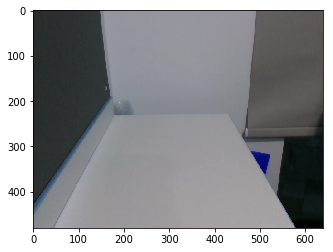

In [11]:
import matplotlib.pyplot as plt
plt.imshow(np.asanyarray(color.get_data()))

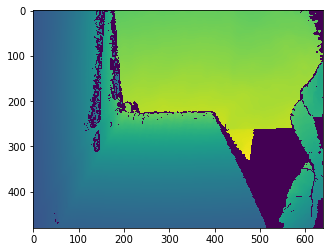

In [12]:
plt.imshow(np.asanyarray(depth.get_data()))

In [33]:
p = pcl.load("1.ply")

In [30]:
vgf = p.make_voxel_grid_filter()
vgf.set_leaf_size(0.02,0.02,0.02)

In [39]:
np = vgf.filter().to_array()

In [41]:
pptk.viewer(np)

In [46]:
from scipy import spatial
x = np.linspace(-10,10,100)
y = np.linspace(-10,10,100)
X,Y,Z = np.meshgrid(x, y)
points = zip(x.ravel(), y.ravel())
tree = spatial.KDTree(points)
tree.query_ball_point([2, 0], 1)

AttributeError: 'numpy.ndarray' object has no attribute 'linspace'